# **Welcome to Visa Data Exploratory Data Analysis Notebook**

Contents:
1. Upload / Clean Data

2. EDA
- Univariate, Bivariate, Multivariate

3. Logistic Regression Assumptions

4. Conclusion
- Key takeaways, recommendations, executive summary.

# Upload / Clean Data

In [1]:
import pandas as pd
import pymongo
from pymongo import MongoClient

df = pd.read_csv('visadata')

In [2]:
df.head()

,_id,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,663386b45b3d712386ab53f6,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,663386b45b3d712386ab53f7,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,663386b45b3d712386ab53f8,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,663386b45b3d712386ab53f9,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,663386b45b3d712386ab53fa,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _id                    25480 non-null  object 
 1   case_id                25480 non-null  object 
 2   continent              25480 non-null  object 
 3   education_of_employee  25480 non-null  object 
 4   has_job_experience     25480 non-null  object 
 5   requires_job_training  25480 non-null  object 
 6   no_of_employees        25480 non-null  int64  
 7   yr_of_estab            25480 non-null  int64  
 8   region_of_employment   25480 non-null  object 
 9   prevailing_wage        25480 non-null  float64
 10  unit_of_wage           25480 non-null  object 
 11  full_time_position     25480 non-null  object 
 12  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 2.5+ MB


# EDA

## Univariate Analysis:

### Numerical Features:
- Number of Employees
- Prevailing Wage
- Year of Establishment

In [4]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Look further into why number of employees has negative numbers, and how we can mitigate the possible influential outcomes this has on case status.

This first establishment in 1800 and the most recent was created in 2016. The median is 1997, showing that there was possibly a significant amount of establishments created in the 1990s - 2000s.

Wages have gone up significantly. How did it go from 2 to 319,210. Is the minimum relative to the age of the establishment?



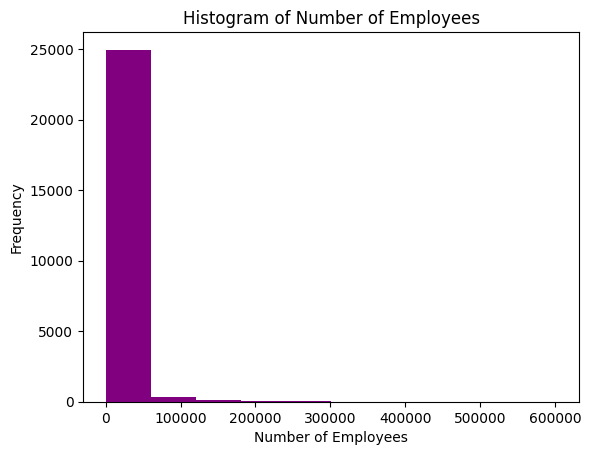

In [5]:
import matplotlib.pyplot as plt

plt.hist(df['no_of_employees'], color = 'purple')
plt.title(f'Histogram of Number of Employees')
plt.xlabel('Number of Employees')
plt.ylabel('Frequency')
plt.show()

Right Skewed. The number of employees is not distributed evenly which might affect/influence our analysis.

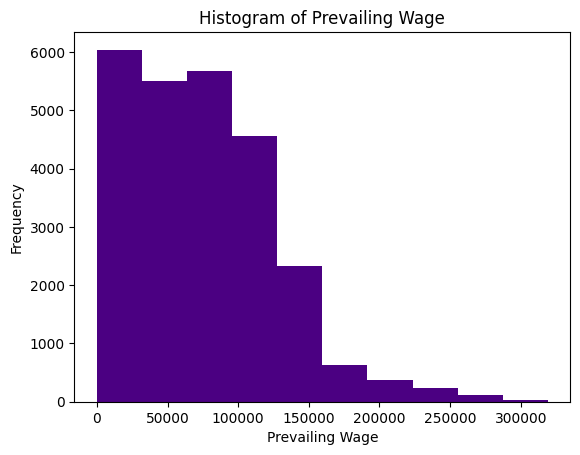

In [6]:
plt.hist(df['prevailing_wage'], color = 'indigo')
plt.title(f'Histogram of Prevailing Wage')
plt.xlabel('Prevailing Wage')
plt.ylabel('Frequency')
plt.show()

This is right-skewed, but resembles some distribution. There might be some outliers on the upper end of the scale. Might be helpful to plot on a boxplot/pairplot.

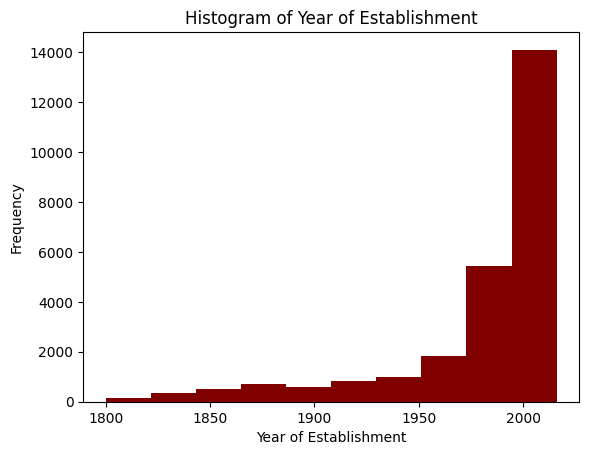

In [7]:
plt.hist(df['yr_of_estab'], color = 'maroon')
plt.title(f'Histogram of Year of Establishment')
plt.xlabel('Year of Establishment')
plt.ylabel('Frequency')
plt.show()

Years of Establishment is left-skewed. This indicates that the dataset has newer establishments as they are increasing over time. Furthermore, looking into the outliers from the earlier establishments might show trends and patterns to look for in newer establishments.

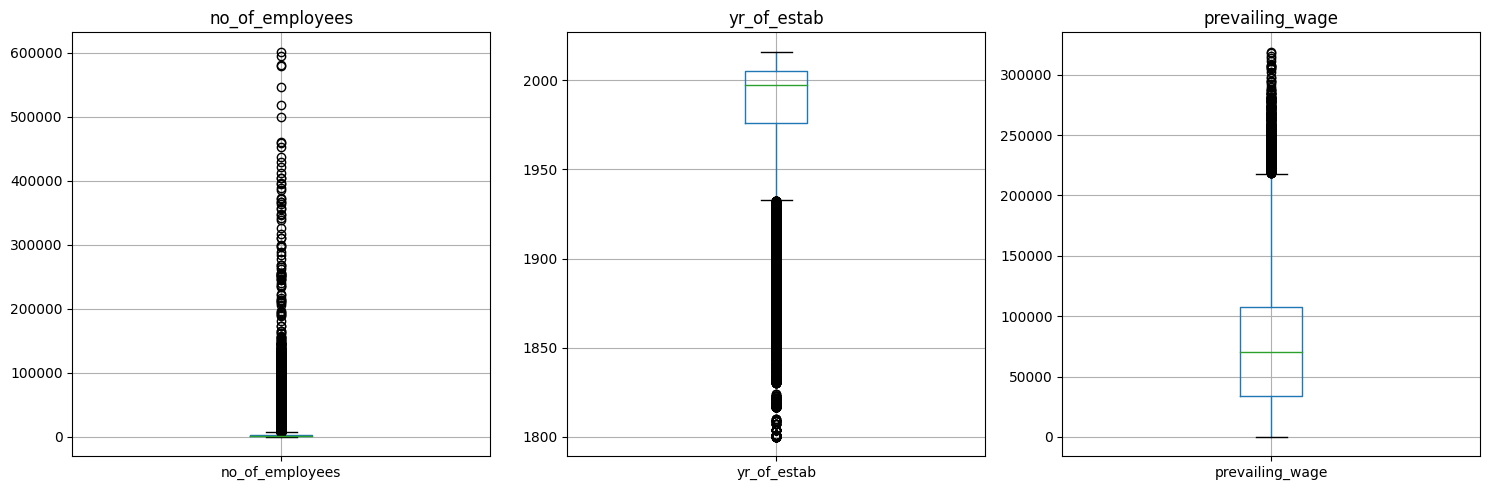

In [8]:
import seaborn as sns

# Filter out non-numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(15, 5))

# Plot box plots for each numeric feature
for i, column in enumerate(numeric_columns):
    df.boxplot(column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Like stated before, number of employees has a small box on the lower end of the range with many outliers within it. This will need to be looked at further, possibly feature engineering will help with an accurate prediction model.

Also, newer establishments are more frequent, but there are many documented establishments that lie outside of the box that could be significant to the interpretation of the data. As well as, we must consider the time frame.

### Categorical Variables:

- Full-time Position
- Unit of Wage
- Continent
- Education of Employee
- Requires Job Training
- Has Job Experience
- Region of Employment
- Case Status

Total: 8


#### Counts

In [9]:
df['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

A minimal amount of employment in the region listed as Island.

In [10]:
df['full_time_position'].value_counts()

full_time_position
Y    22773
N     2707
Name: count, dtype: int64

More full time positions.

In [11]:
df['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

Most of the wages are listed as yearly wages, with hourly the next frequent. This makes sense, as most of the positions are full-time.

In [12]:
df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

A significant amount of entries from Asia.

In [13]:
df['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

Most employees have a Bachelors degree or Masters degree.

In [14]:
df['has_job_experience'].value_counts()

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

The split is pretty closs together with about a 400 difference.

In [15]:
df['requires_job_training'].value_counts()

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

Uneven split between employees that need job training. A lot of them are experienced and do not neeed training. It could be interesting to find out if job experience and degree might correlate to this variable.

In [16]:
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

Will need to look into balancing this target variable in order to test and to improve the model.

#### Visuals

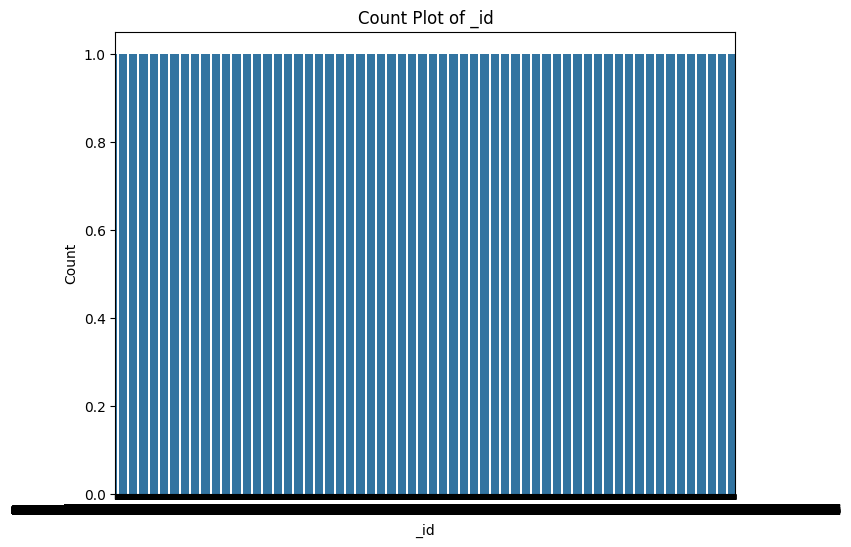

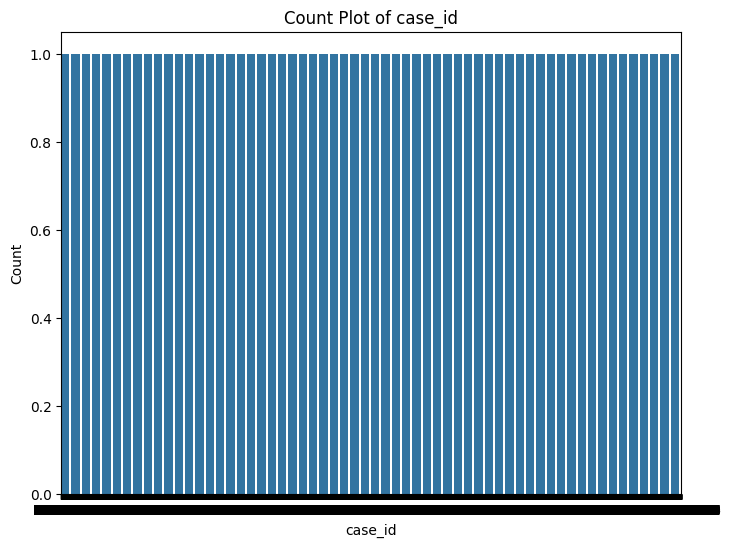

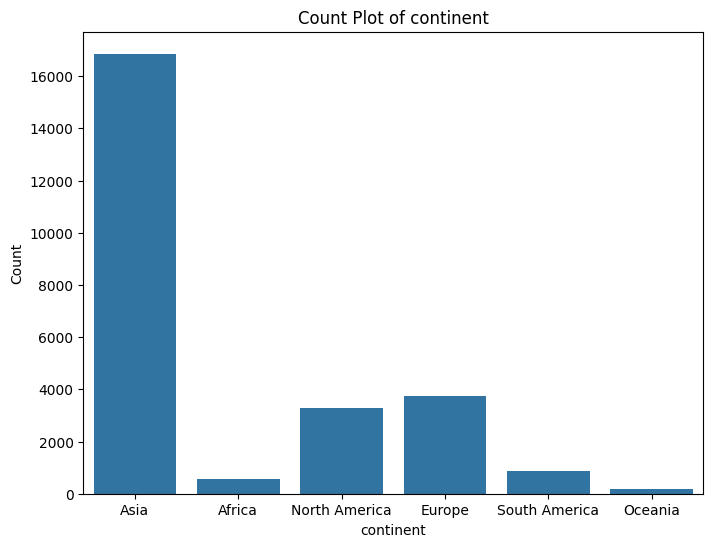

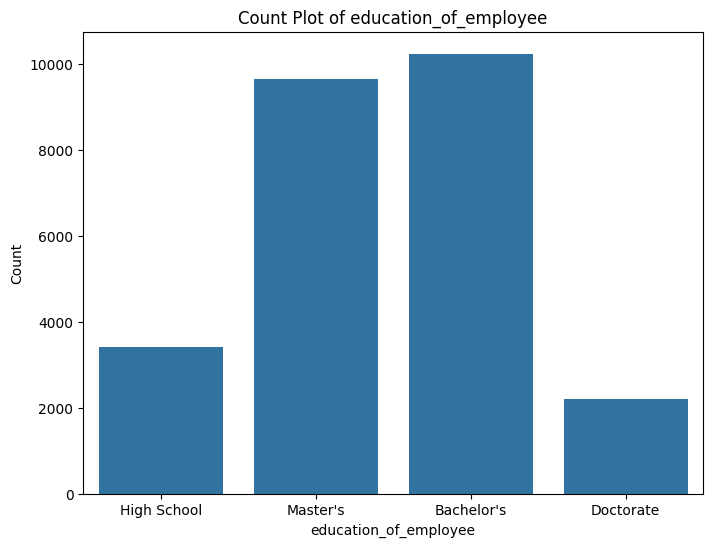

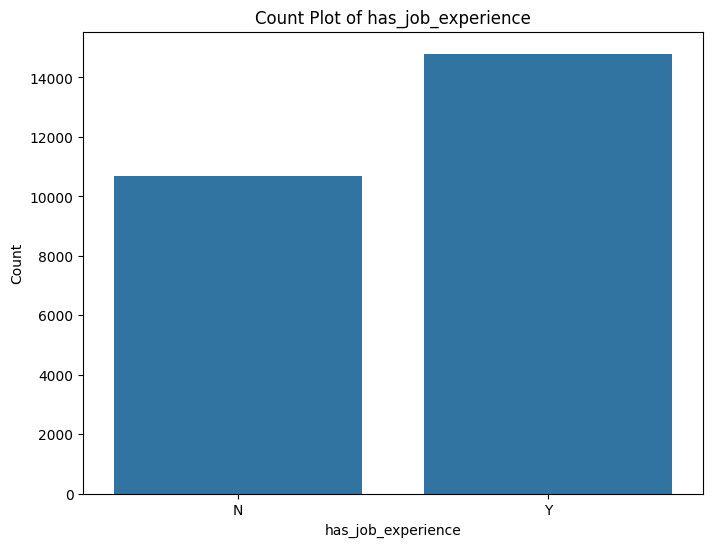

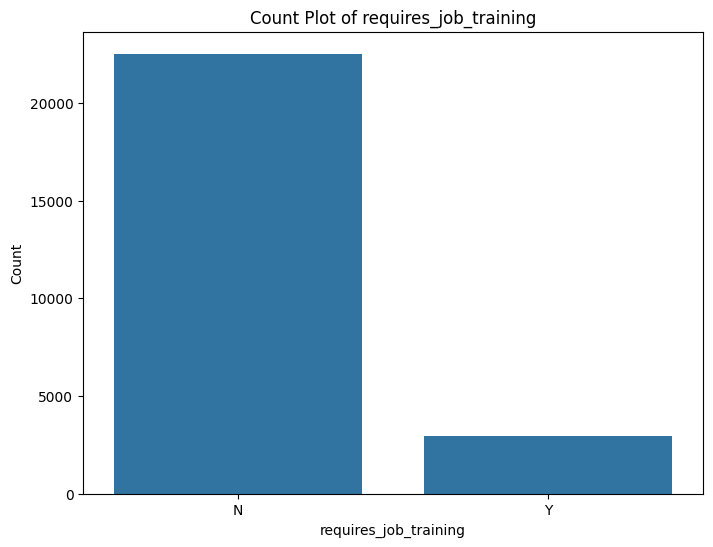

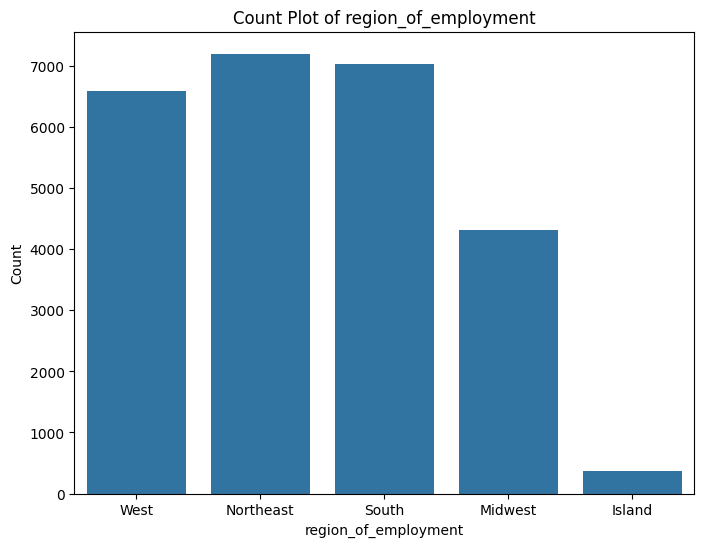

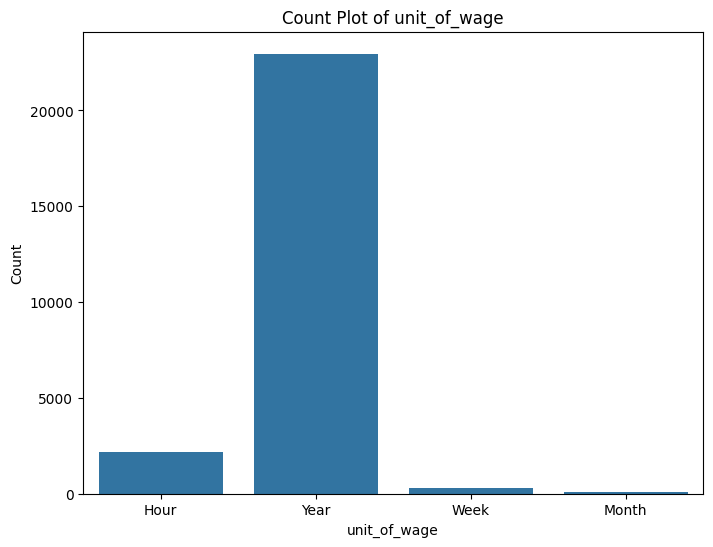

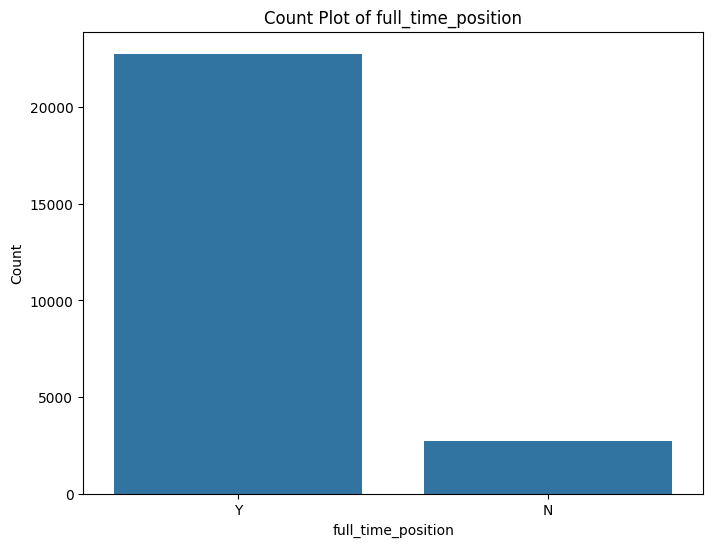

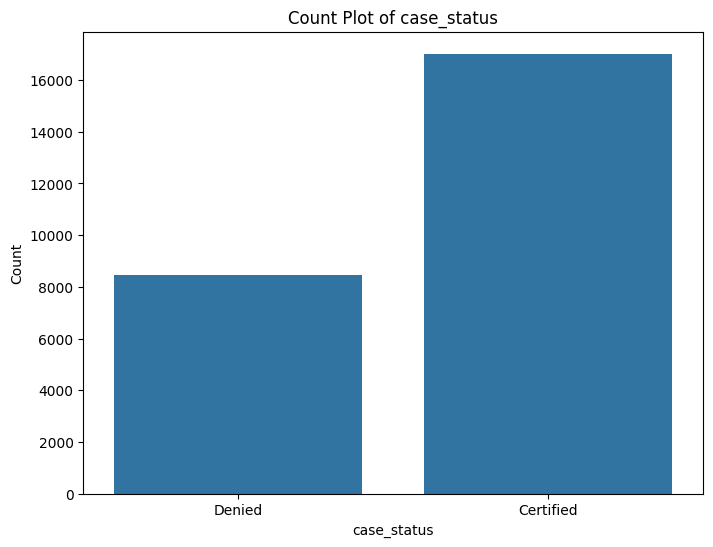

In [17]:
# Get list of categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# Loop through categorical columns and create count plots
for column in cat_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Count Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


## Bivariate Analysis:

Features to Analyze:

- Education of Employee to Requires Job Training
- Education of Employee to Job Experience
- Previaling wage to Region of Employment
- Year of Establishment to Prevailing Wage
- Prevailing Wage to Unit of Wage

Text(0.5, 1.0, 'Education of Employee to Requires Job Training')

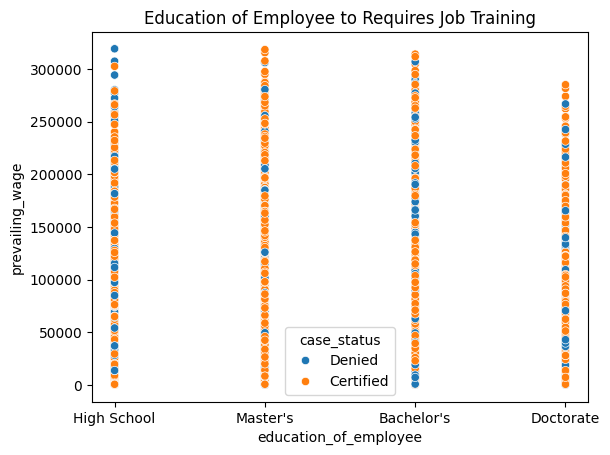

In [18]:
ax = sns.scatterplot(data =df, x = 'education_of_employee', y = 'prevailing_wage', hue = 'case_status')
ax.set_title('Education of Employee to Requires Job Training')

The wages of each education is pretty evenely distributed considering how many have a masters or bachelors. THe case status is also pretty spidt here, but it looks like masters and doctorate have the most certified.

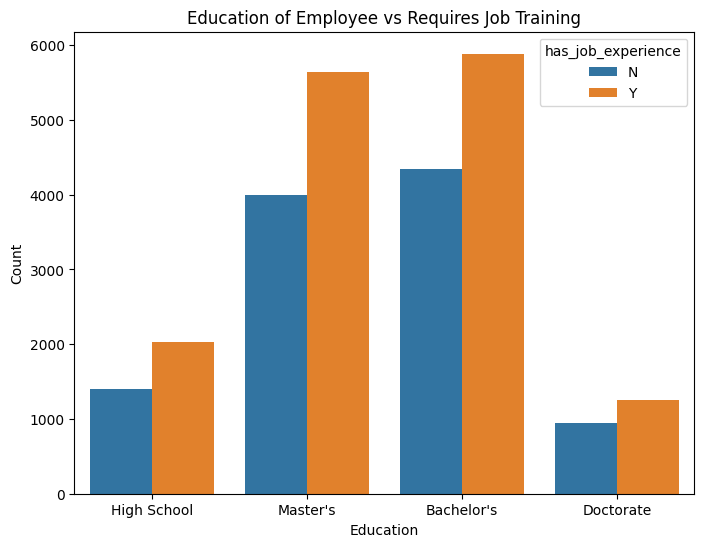

In [19]:
# Count plot: Education of Employee vs Requires Job Training
plt.figure(figsize=(8, 6))
sns.countplot(x='education_of_employee', hue='has_job_experience', data=df)
plt.title('Education of Employee vs Requires Job Training')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

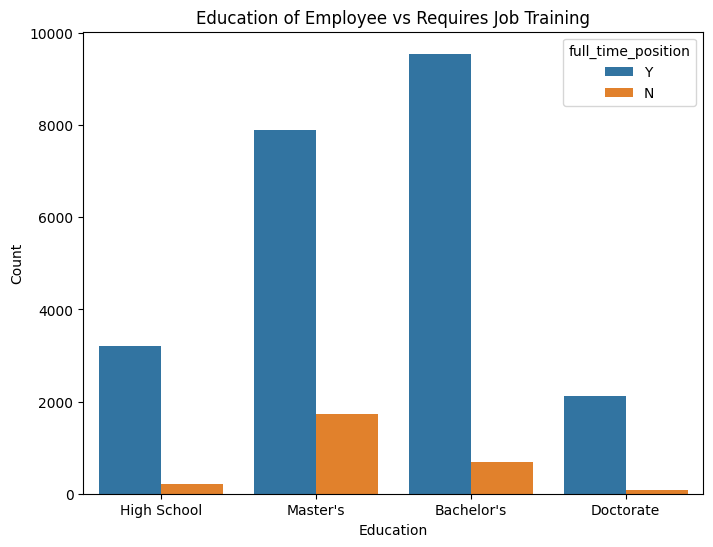

In [20]:
# Count plot: Education of Employee vs Requires Job Training
plt.figure(figsize=(8, 6))
sns.countplot(x='education_of_employee', hue='full_time_position', data=df)
plt.title('Education of Employee vs Requires Job Training')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

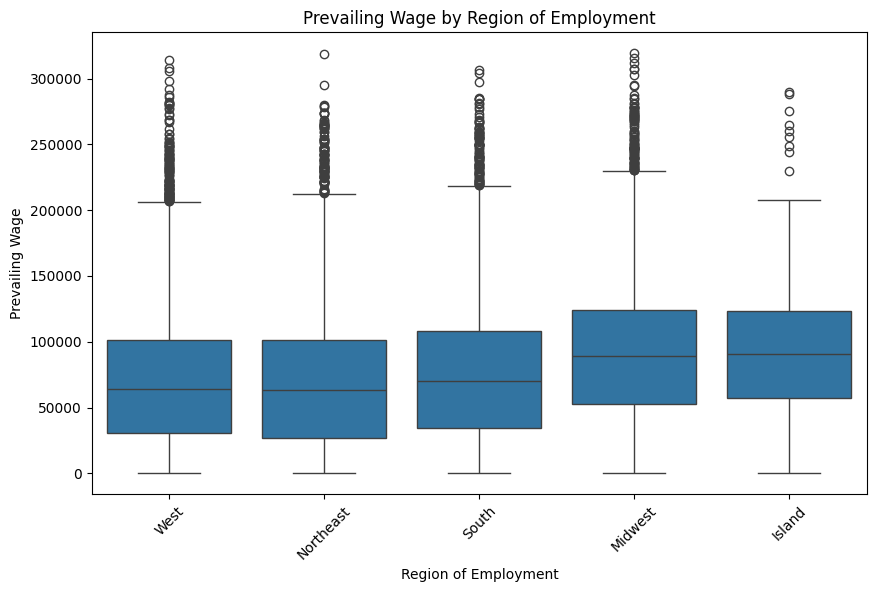

In [21]:
# Box plot: Prevailing Wage by Region of Employment
plt.figure(figsize=(10, 6))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=df)
plt.title('Prevailing Wage by Region of Employment')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=45)
plt.show()

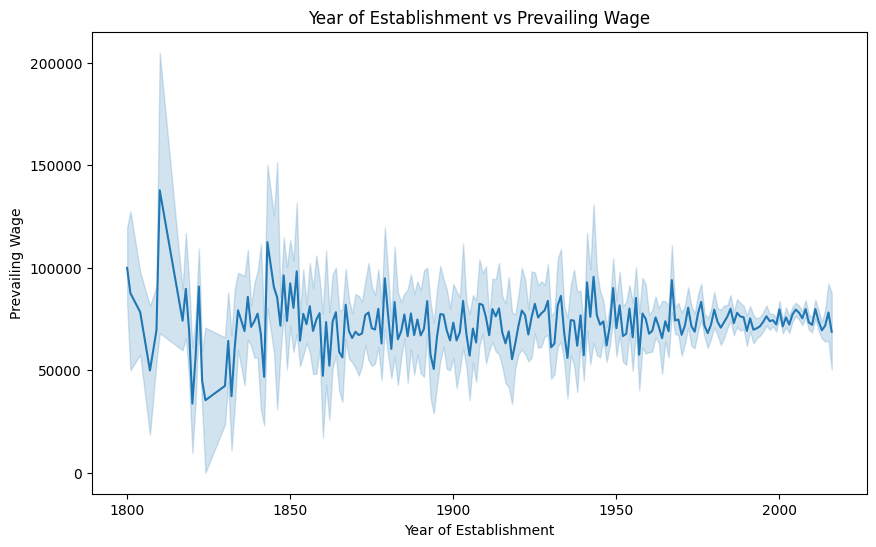

In [22]:
# Line plot: Year of Establishment to Prevailing Wage
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_of_estab', y='prevailing_wage', data=df)
plt.title('Year of Establishment vs Prevailing Wage')
plt.xlabel('Year of Establishment')
plt.ylabel('Prevailing Wage')
plt.show()

Might look at how the unit of wages changes through time.

<Figure size 800x600 with 0 Axes>

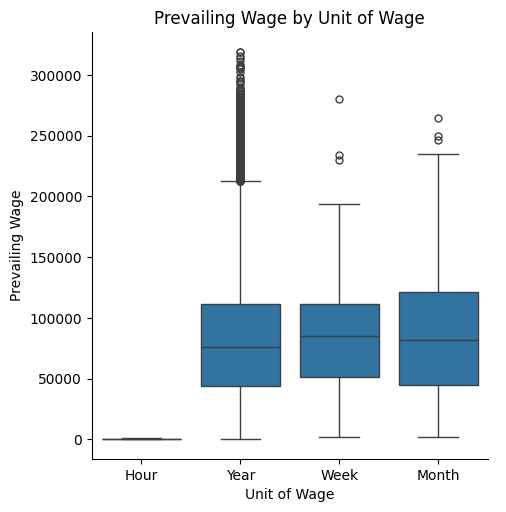

In [23]:
# Categorical plot: Prevailing Wage by Unit of Wage
plt.figure(figsize=(8, 6))
sns.catplot(x='unit_of_wage', y='prevailing_wage', kind='box', data=df)
plt.title('Prevailing Wage by Unit of Wage')
plt.xlabel('Unit of Wage')
plt.ylabel('Prevailing Wage')
plt.show()

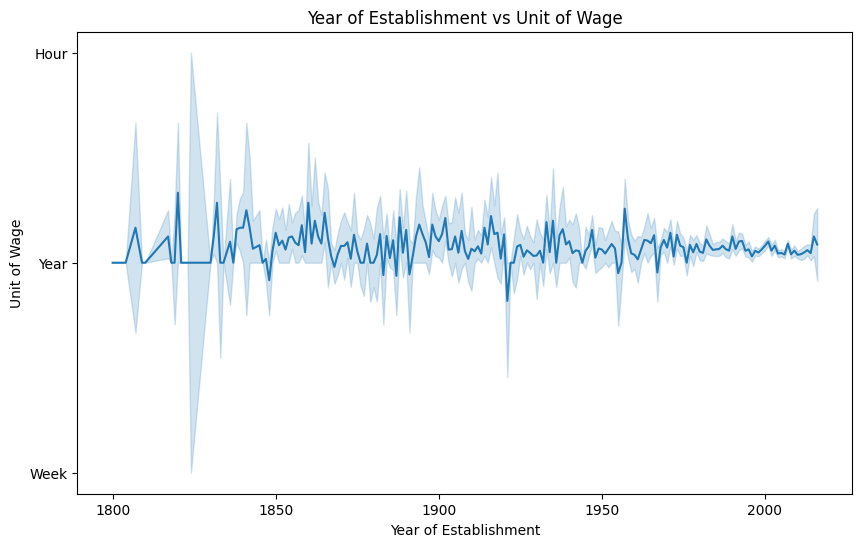

In [24]:
# Line plot: Year of Establishment to Unit of Wage
plt.figure(figsize=(10, 6))
sns.lineplot(x='yr_of_estab', y='unit_of_wage', data=df)
plt.title('Year of Establishment vs Unit of Wage')
plt.xlabel('Year of Establishment')
plt.ylabel('Unit of Wage')
plt.show()

This might be why the wages are higher in the earlier years of establishment. They were most likely going by weekly and hourly, and that influences the interpretation of the prevailing wage.

## Multivariate Analysis:

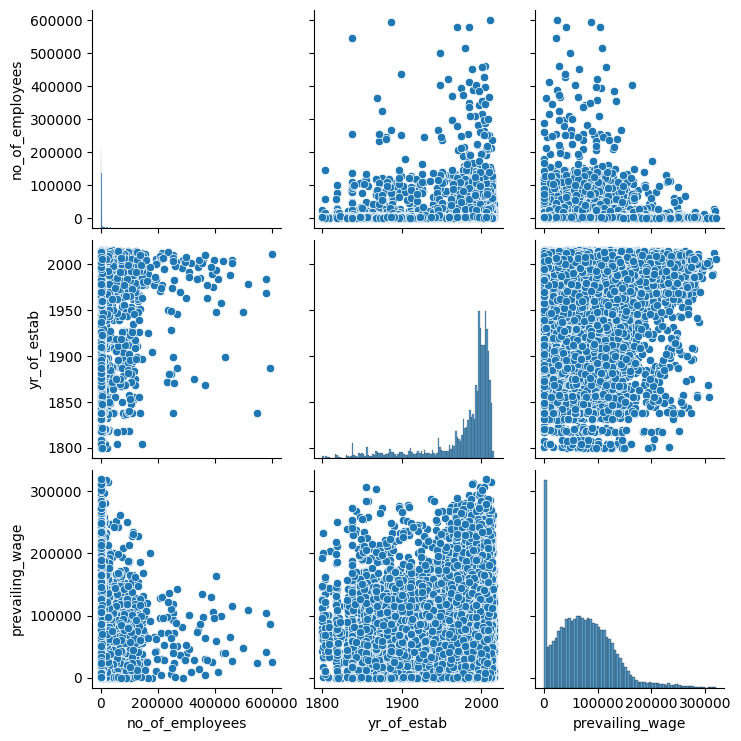

In [25]:
# Pairwise Scatter Plot Matrix
sns.pairplot(df)
plt.show()

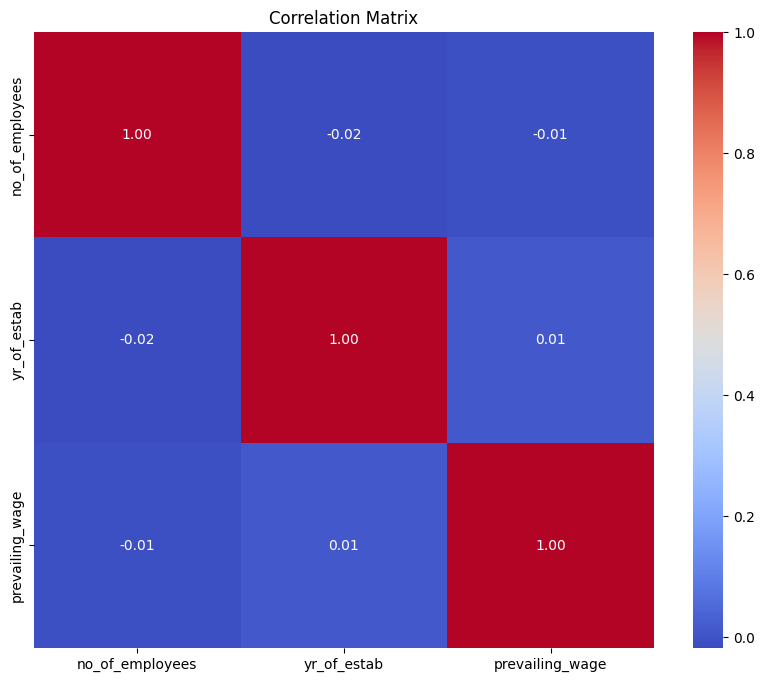

In [26]:
#Assuming you have a DataFrame named 'data'
numerical_columns = df.select_dtypes(include=['int', 'float'])

# Correlation Matrix
correlation_matrix = numerical_columns.corr()

# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Logistic Regression Assumptions:

1. Linearity of Independent Variables
2. Binary Outcome
3. No multicollinearity
4. Indendependence

In [ ]:
# Binary Outcome
df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

Denied = 0, and certified = 1

the split is not even. will need to smote the target.

In [ ]:
# No multicollinearity

In [ ]:
# Independence

# Conclusion

Key Takeaways:


Executive Summary:

Recommendations: